# @BHARAT INTERN 

# DATA SCIENCE INTERN

## AUTHOR : Patil Rachana Baban.

# Task No 1: -Stock prediction using LSTM
Python · Netflix Stock Price

# About the dataset :-
The dataset is available at Kaggle : https://www.kaggle.com/code/stpeteishii/netflix-stock-prediction-lstm/output

* The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market. In this work, I present a Long Short-Term Memory (LSTM) approach to predict stock market indices.

In [1]:
#Importing liabraries
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#importing dataset
df = pd.read_csv("D://datas//data 2//stocks//NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


<Axes: xlabel='Date'>

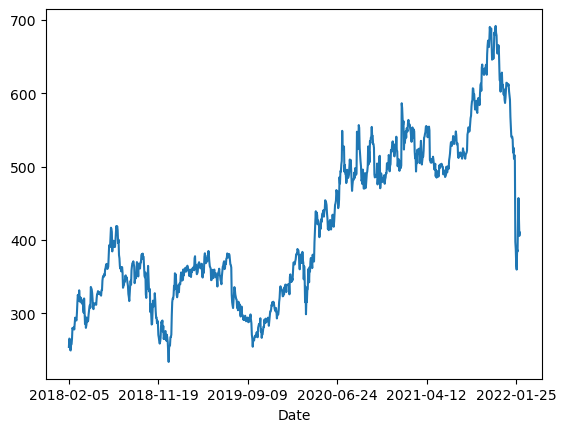

In [5]:
cls = df[('Close')]
cls.plot()

In [6]:
df1=cls.values
df1

array([254.259995, 265.720001, 264.559998, ..., 429.480011, 405.600006,
       410.170013])

In [7]:
df1.shape

(1009,)

# Data Visiualization

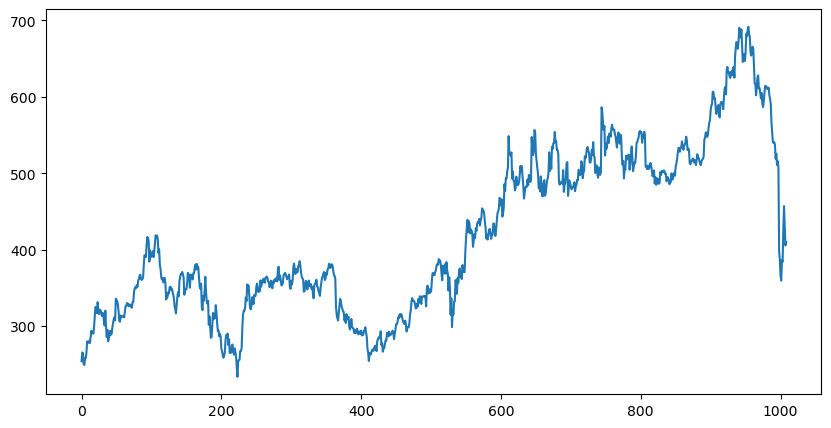

In [8]:
#plotting the data
plt.figure(figsize=(10,5))
plt.plot(df1)

In [9]:
#scalling the data
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [11]:
len(df1)

1009

# Splitting the data into train and test

In [12]:
#Defining train and test sizes of data
train_size = int(len(df1)*0.8)
test_size = len(df1) - train_size 

In [13]:
train_size ,test_size 

(807, 202)

In [14]:
#Splitting data between train and test
train = df1[0:train_size,:]  


In [15]:
test = df1[train_size:len(df1),:1]

In [16]:
len(train),len(test)

(807, 202)

# Creating LSTM Model

In [17]:
#creating dataset matrix for LSTM model
def create_df(dataset,step):
    X, y = [], []
    for i in range(len(dataset)-step-1):
        ds = dataset[i:(i+step),0]
        X.append(ds)
        y.append(dataset[i+step,0])
    return np.array(X), np.array(y)

In [18]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train,y_train = create_df(train,time_stamp)
X_test,y_test = create_df(test,time_stamp)

In [19]:
X_train.shape,y_train.shape

((706, 100), (706,))

In [20]:
X_test.shape,y_test.shape

((101, 100), (101,))

In [21]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [22]:
#Importing the liabraries for LSTM
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [23]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Fitting the Model

In [24]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=128)

Epoch 1/100
6/6 [==============================] - 14s 966ms/step - loss: 0.0651 - val_loss: 0.0548
Epoch 2/100
6/6 [==============================] - 4s 665ms/step - loss: 0.0155 - val_loss: 0.0675
Epoch 3/100
6/6 [==============================] - 4s 636ms/step - loss: 0.0110 - val_loss: 0.0263
Epoch 4/100
6/6 [==============================] - 4s 649ms/step - loss: 0.0060 - val_loss: 0.0179
Epoch 5/100
6/6 [==============================] - 4s 679ms/step - loss: 0.0046 - val_loss: 0.0249
Epoch 6/100
6/6 [==============================] - 4s 708ms/step - loss: 0.0043 - val_loss: 0.0163
Epoch 7/100
6/6 [==============================] - 4s 722ms/step - loss: 0.0034 - val_loss: 0.0172
Epoch 8/100
6/6 [==============================] - 4s 667ms/step - loss: 0.0031 - val_loss: 0.0156
Epoch 9/100
6/6 [==============================] - 4s 700ms/step - loss: 0.0030 - val_loss: 0.0194
Epoch 10/100
6/6 [==============================] - 4s 738ms/step - loss: 0.0030 - val_loss: 0.0156
Epoch 11

6/6 [==============================] - 4s 661ms/step - loss: 0.0017 - val_loss: 0.0060
Epoch 84/100
6/6 [==============================] - 4s 633ms/step - loss: 0.0016 - val_loss: 0.0061
Epoch 85/100
6/6 [==============================] - 4s 711ms/step - loss: 0.0017 - val_loss: 0.0063
Epoch 86/100
6/6 [==============================] - 4s 620ms/step - loss: 0.0017 - val_loss: 0.0060
Epoch 87/100
6/6 [==============================] - 4s 652ms/step - loss: 0.0016 - val_loss: 0.0060
Epoch 88/100
6/6 [==============================] - 4s 670ms/step - loss: 0.0016 - val_loss: 0.0063
Epoch 89/100
6/6 [==============================] - 4s 694ms/step - loss: 0.0016 - val_loss: 0.0059
Epoch 90/100
6/6 [==============================] - 4s 690ms/step - loss: 0.0015 - val_loss: 0.0058
Epoch 91/100
6/6 [==============================] - 4s 680ms/step - loss: 0.0015 - val_loss: 0.0059
Epoch 92/100
6/6 [==============================] - 4s 670ms/step - loss: 0.0015 - val_loss: 0.0058
Epoch 93/100


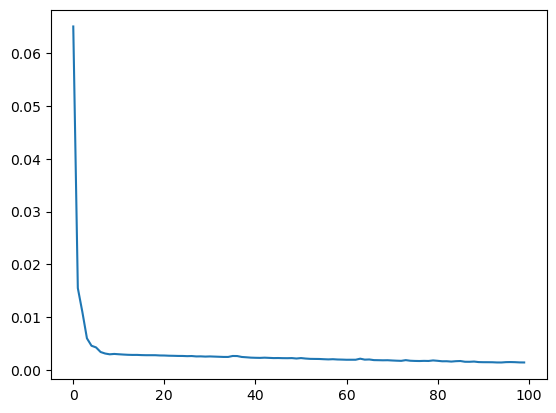

In [25]:
#plotting loss, which shows that loss has decreased significantly and model has trained well.
loss = model.history.history['loss']
plt.plot(loss)

# Prediction

In [26]:
#Predicting on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 [==============================] - 0s 57ms/step


In [27]:
#Inverse transformation to get actual value.
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Compairing using data visiualization

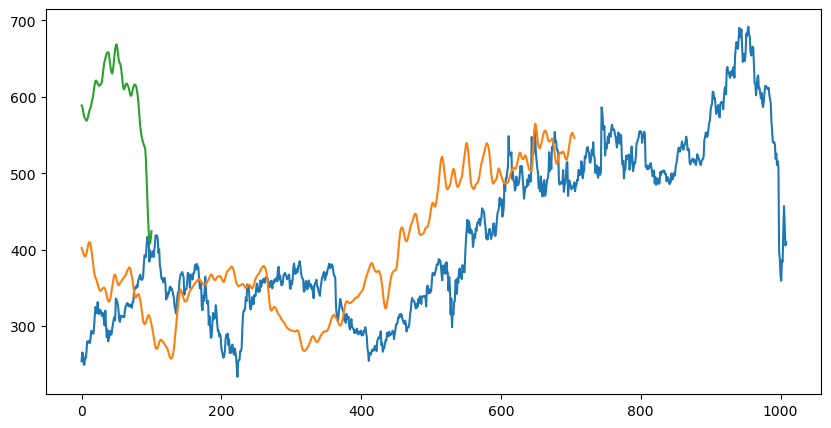

In [28]:
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict)
plt.plot(test_predict)

In [29]:
test = np.vstack((train_predict, test_predict))

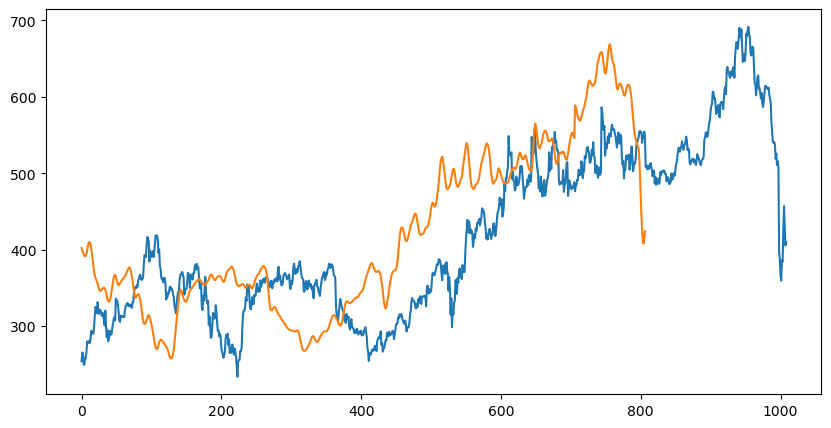

In [30]:
#Combining the predicted data to create uniform data visiualization
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(df1))
plt.plot(test)

In [31]:
len(test)

807

In [32]:
#Getting the last 100 days records
fut_inp = test[707: ]
fut_inp = fut_inp.reshape(1,-1)
fut_inp.shape

(1, 100)

In [33]:
tmp_inp = list(fut_inp)

In [34]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

# Predicting next 30 days prices

In [35]:
## Predicting next 30 days price suing the current data.
#It will predict in sliding window manner (algorithm) with stride 1
lst_output = []
n_steps = 100
i = 0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp = fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1,n_steps,1))
        yhat = model.predict(fut_inp,verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp =  tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        fut_inp =  fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i+1
            
           
            
print(lst_output)                         

[[1.9219930171966553], [1.7406041622161865], [1.5993568897247314], [1.4690734148025513], [1.3380017280578613], [1.2091649770736694], [1.0903255939483643], [0.9885072708129883], [0.9075676202774048], [0.8466770052909851], [0.8006377816200256], [0.7638003826141357], [0.7321099042892456], [0.703410267829895], [0.6785704493522644], [0.6600202918052673], [0.6490396857261658], [0.6451892256736755], [0.647325873374939], [0.6545877456665039], [0.6666920185089111], [0.6836697459220886], [0.7054551839828491], [0.7316107153892517], [0.7612509727478027], [0.793114185333252], [0.8257008790969849], [0.857430636882782], [0.8867818713188171], [0.912411093711853]]


In [36]:
len(df1)

1009

In [37]:
#Creating a dummay plane to plot graph one after another
plot_new = np.arange(1,101)
plot_pred = np.arange(101,131)

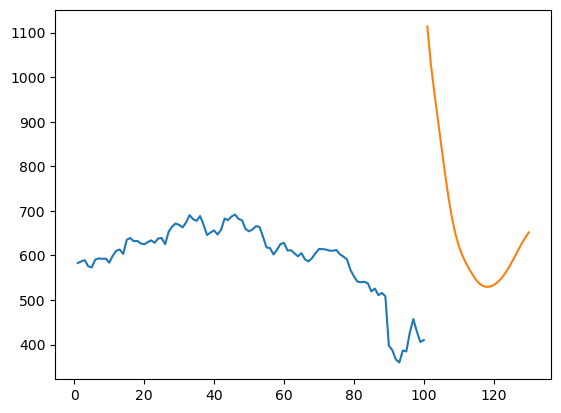

In [38]:
#plt.figure(figsize=(10,5))
plt.plot(plot_new,scaler.inverse_transform(df1[909:]))
plt.plot(plot_pred,scaler.inverse_transform(lst_output))

In [39]:
ds_new = df1.tolist()

In [40]:
len(ds_new)

1009

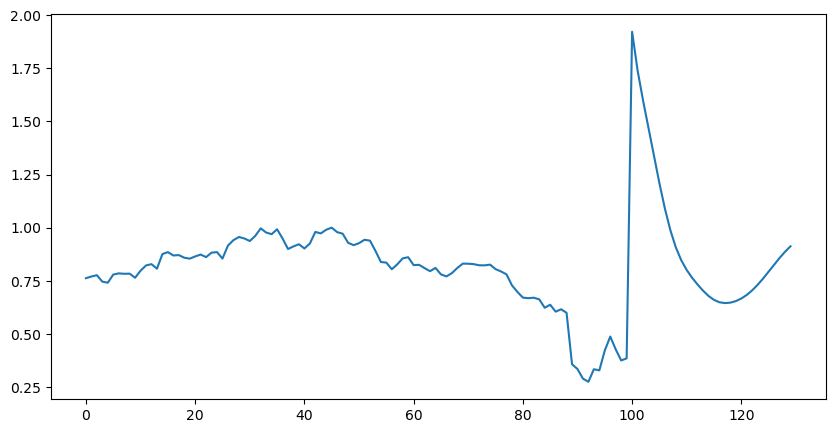

In [41]:
#filling the missing value with approx value
plt.figure(figsize=(10,5))
ds_new.extend(lst_output)
plt.plot(ds_new[909:])

# By this way we can predict the stock prices